# Using Qiskit Terra

abraham.asfaw@ibm.com<br/>
April 2019<br/>
(Thanks to donny@ibm.com, kevin.krsulich@ibm.com and talexander@ibm.com)

Qiskit Terra contains tools that **define**, **compile** and **execute** quantum circuits on arbitrary **backends**

For much of this talk, I will focus on a simple circuit that creates two-qubit entanglement.

[Generating a Bell state](https://demonstrations.wolfram.com/GeneratingEntangledQubits/)


In [1]:
# Your first Qiskit application
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qr = QuantumRegister(2) # qubits indexed as qr[0], qr[1] and qr[2]
cr = ClassicalRegister(2) # classical bits indexed as cr[0], cr[1] and cr[2]
circuit = QuantumCircuit(qr, cr)

In [2]:
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)

Additional gates can be found in our qiskit tutorials on Github<br/>
[List of quantum operations](https://github.com/Qiskit/qiskit-tutorials/blob/master/qiskit/terra/summary_of_quantum_operations.ipynb)

In [3]:
circuit.draw()

In [4]:
circuit.draw(output='latex_source')

'% \\documentclass[preview]{standalone}\n% If the image is too large to fit on this documentclass use\n\\documentclass[draft]{beamer}\n% img_width = 4, img_depth = 6\n\\usepackage[size=custom,height=10,width=12,scale=0.7]{beamerposter}\n% instead and customize the height and width (in cm) to fit.\n% Large images may run out of memory quickly.\n% To fix this use the LuaLaTeX compiler, which dynamically\n% allocates memory.\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{amsmath}\n\\pdfmapfile{+sansmathaccent.map}\n% \\usepackage[landscape]{geometry}\n% Comment out the above line if using the beamer documentclass.\n\\begin{document}\n\\begin{equation*}\n    \\Qcircuit @C=0.5em @R=0.0em @!R {\n\t \t\\lstick{q0_{0}: \\ket{0}} & \\gate{H} & \\ctrl{1} & \\qw & \\meter & \\qw & \\qw\\\\\n\t \t\\lstick{q0_{1}: \\ket{0}} & \\qw & \\targ & \\meter & \\qw & \\qw & \\qw\\\\\n\t \t\\lstick{c0_{0}: 0} & \\cw & \\cw & \\cw & \\cw \\cwx[-2] & \\cw & \\cw\\\\\n\t \t\\lstick{c0_{1}: 0} & \\cw & \\cw &

In [5]:
print(circuit.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[2];
creg c0[2];
h q0[0];
cx q0[0],q0[1];
measure q0[0] -> c0[0];
measure q0[1] -> c0[1];



### Compiling and executing the circuit on a simulator backend

In [6]:
from qiskit import Aer, execute

# pick a backend, in this case a simulator
backend = Aer.get_backend('qasm_simulator')

# start a simulation job on the backend
job = execute(circuit, backend, shots=1000)

# collect the job results and display them
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'11': 519, '00': 481}


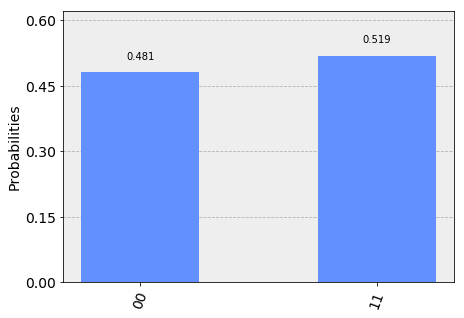

In [7]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

### Compiling and executing the circuit on a real device

In [8]:
from qiskit import IBMQ

IBMQ.load_accounts()
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>,
 <IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-internal, yrk, main)>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(ibm-q-internal, yrk, main)>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ(ibm-q-internal, yrk, main)>]

In [9]:
# OPTION 1: pick a specific backend
backend = IBMQ.get_backend('ibmq_16_melbourne')
# OPTION 2: pick the least busy backend
from qiskit.providers.ibmq import least_busy
backend = least_busy(IBMQ.backends(simulator=False))

# start a simulation job on the backend
job = execute(circuit, backend, shots=1000)

# collect the job results and display them
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'01': 68, '11': 425, '10': 70, '00': 437}


In [10]:
# OPTION 1: pick a specific backend
backend = IBMQ.get_backend('ibmq_16_melbourne')
# OPTION 2: pick the least busy backend
from qiskit.providers.ibmq import least_busy
backend = least_busy(IBMQ.backends(simulator=False))

# start a simulation job on the backend
job = execute(circuit, backend, shots=1000)

# monitor the job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

# collect the job results and display them
result = job.result()
counts = result.get_counts(circuit)
print(counts)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

{'01': 76, '11': 398, '10': 40, '00': 486}


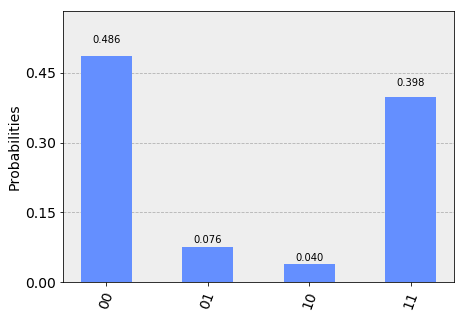

In [11]:
plot_histogram(counts)

In [12]:
%qiskit_backend_monitor backend

## What goes on under the hood when you call `execute`

<img src='execute_flow.pngpng.png'>

In [13]:
qr = QuantumRegister(7, 'q')
qr = QuantumRegister(7, 'q')
tpl_circuit = QuantumCircuit(qr)
tpl_circuit.h(qr[3])
tpl_circuit.cx(qr[0], qr[6])
tpl_circuit.cx(qr[6], qr[0])
tpl_circuit.cx(qr[0], qr[1])
tpl_circuit.cx(qr[3], qr[1])
tpl_circuit.cx(qr[3], qr[0])
tpl_circuit.draw()

In [14]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import BasicSwap
from qiskit.transpiler import transpile
from qiskit.mapper import CouplingMap

In [15]:
help(BasicSwap)

Help on class BasicSwap in module qiskit.transpiler.passes.mapping.basic_swap:

class BasicSwap(qiskit.transpiler._basepasses.TransformationPass)
 |  BasicSwap(*args, **kwargs)
 |  
 |  Maps (with minimum effort) a DAGCircuit onto a `coupling_map` adding swap gates.
 |  
 |  Method resolution order:
 |      BasicSwap
 |      qiskit.transpiler._basepasses.TransformationPass
 |      qiskit.transpiler._basepasses.BasePass
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, coupling_map, initial_layout=None)
 |      Maps a DAGCircuit onto a `coupling_map` using swap gates.
 |      Args:
 |          coupling_map (CouplingMap): Directed graph represented a coupling map.
 |          initial_layout (Layout): initial layout of qubits in mapping
 |  
 |  run(self, dag)
 |      Runs the BasicSwap pass on `dag`.
 |      Args:
 |          dag (DAGCircuit): DAG to map.
 |      
 |      Returns:
 |          DAGCircuit: A mapped DAG.
 |  
 |  --------------------------------

In [16]:
coupling = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]

simulator = Aer.get_backend('qasm_simulator')
coupling_map = CouplingMap(couplinglist=coupling)
pass_manager = PassManager()
pass_manager.append([BasicSwap(coupling_map=coupling_map)])
basic_circ = transpile(tpl_circuit, simulator, pass_manager=pass_manager)
basic_circ.draw()

In [17]:
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>,
 <IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-internal, yrk, main)>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(ibm-q-internal, yrk, main)>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ(ibm-q-internal, yrk, main)>]

In [18]:
realdevice = IBMQ.get_backend('ibmq_16_melbourne')
tpl_realdevice = transpile(tpl_circuit, backend = realdevice)
tpl_realdevice.draw(line_length = 250)

**Transpilation is a work in progress, with significant contributions from within and outside IBM.**
    * Can lead to significant overhead on real devices, leading to more noise


# Running quantum algorithms

* Shor's Algorithm
    * Discrete FT = O($(2^n)^2$)
    * Fast FT = O($n\cdot2^n$)    
    * Quantum FT = O($n\cdot n$) [Tutorial in Qiskit Github](https://github.com/Qiskit/qiskit-tutorials/blob/master/community/terra/qis_adv/fourier_transform.ipynb)
* Grover's Algorithm
    * Classical search is at least O(N)
    * Grover's algorithm = O($\sqrt{N}$) [Tutorial in Qiskit Github](https://github.com/Qiskit/qiskit-tutorials/blob/master/community/algorithms/grover_algorithm.ipynb)
    
* [Other Tutorials](https://github.com/Qiskit/)